# Geospatial Analysis

## Problem Statement

### In this case study we are analysing



### 1. Reading Data from SQL Database
### 2. Analysing Realtion between online order and rating
### 3. Text Cleaning
### 4. Performing Unigram, Bi-gram and Trigram analysis on data
### 5. Extracting Geographical Cordinates 
### 6. Performing Spatial Analysis
### 7. Automating Spatial Analysis

### Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Reading Data from SQL Database

In [3]:
con = sqlite3.connect(r"C:\Users\ARYAN YADAV\OneDrive\Documents\Resources\zomato_rawdata.sqlite")

### Showing the Data from the database using SQL query

In [4]:
pd.read_sql_query("SELECT * FROM USERS",con).head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Creating the dataframe 

In [5]:
df = pd.read_sql_query("SELECT * FROM USERS",con)

### Checking the shape/Structure of the dataframe

In [6]:
df.shape

(51717, 18)

### Checking the columns of the dataframe

In [7]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Checking the number of null values in dataframe columns

In [8]:
pd.isnull(df).sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

### Checking the percentage od null values affecting the dataframe

In [9]:
pd.isnull(df).sum()/len(df)*100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

### 2. Analysing Realtion between online order and rating

### Checking the unique balues in the rate column in the dataframe

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Replacing the garbage value with the NaN value in the rate column dataframe

In [11]:
df['rate'].replace(('NEW','-'), np.nan ,inplace = True)

### Checking the changes in the rte column of the dataframe

In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

### Converting the values inside the rate column into the insightful data for the feasiability of the visualtization 
#### In this step we are cleaning the text by removing the '/5' from each values

In [13]:
"4.1/5".split('/')[0]

'4.1'

In [14]:
type("4.1/5".split('/')[0])

str

In [15]:
float("4.1/5".split('/')[0])

4.1

In [16]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x)==str else x)

### Checking the column rate of the dataframe 

In [17]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

### Pivoting the columns online order and rate column for the visualizations

In [18]:
x = pd.crosstab(df['rate'],df['online_order'])

### Plotting the stacked bar chart in which the graph eesembles for which rating the online order has been made

<Axes: xlabel='rate'>

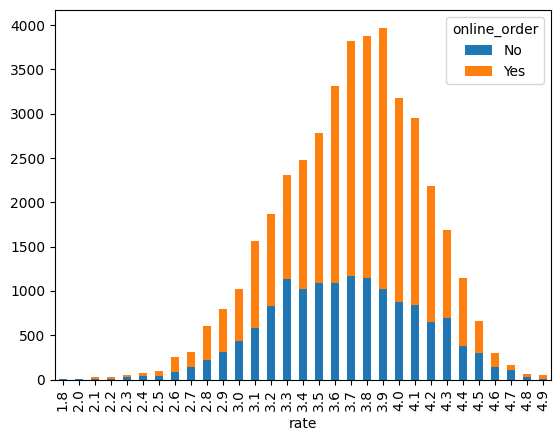

In [19]:
x.plot(kind='bar',stacked=True)

### Analysing the relation between the rating and online orders column on the percentage basis

### Getting the sum of each rating in the dataframe

In [20]:
x.sum(axis = 1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

## Calculating the percentage values for each rating

In [21]:
normalize_df = x.div(x.sum(axis = 1).astype(float), axis = 0)

### Plotting the stacked bar chart

<Axes: xlabel='rate'>

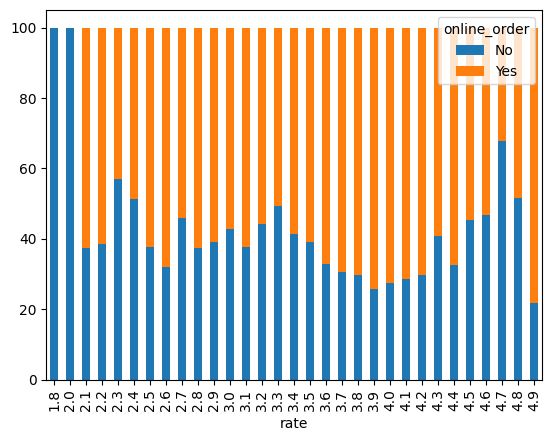

In [22]:
(normalize_df*100).plot(kind='bar',stacked=True)

### 3. Text Cleaning

In [23]:
df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Checking the number of null values in dataframe columns 

In [24]:
df["rest_type"].isnull().sum()

np.int64(227)

### Dropping the null values from the dataframe and storing in different dataframe

In [25]:
data = df.dropna(subset = ['rest_type'])

### Checking the first 5 row

In [26]:
data.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Checking the number of null values in dataframe column after changes

In [27]:
data['rest_type'].isnull().sum()

np.int64(0)

### Checking the unique values from the rest_type column from the dataframe

In [28]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

### Getting the values in the dataframe which has restaurant typ as 'Quick Bites'

In [29]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

### Storing the values of the dataframe which has restaurant type as 'Quick Bites'

In [30]:
quick_bites = data[data['rest_type'].str.contains('Quick Bites')]

### Checking the shape/Structure of the Dataset

In [31]:
quick_bites.shape

(20639, 18)

### Checking the columns of the dataframe

In [32]:
quick_bites.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### Checking the values of reviews_list in the dataframe

In [33]:
quick_bites['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

### Converting and storing the reviews_list column data in to the lower format

In [34]:
quick_bites['reviews_list'] = quick_bites['reviews_list'].apply(lambda x:x.lower())

### Installing the nltk package in the system

In [35]:
!pip install --user -U nltk

### Importing the RegexpTokenizer from the nltk corpus to clean the dataframe 

In [36]:
from nltk.corpus import RegexpTokenizer

In [37]:
tokenizer = RegexpTokenizer("[a-zA-Z]+")

In [38]:
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

### Applying the tokeizer on the reviews_list columns of the dataframe for the testing on how it works

In [39]:
tokenizer.tokenize(quick_bites['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

### Creating sample dataframe which contaiins first 1000 rows 

In [40]:
sample = data[0:10000]

### Applying the tokenization on the sample datframe

In [41]:
reviews_tokens = sample['reviews_list'].apply(tokenizer.tokenize)

### Importing Stopwords module to remove the stopwords from the dataframe

In [42]:
import nltk

In [43]:
from nltk.corpus import stopwords

### Creating the list of the stopwords 

In [44]:
stop = stopwords.words('english')

### Printing the stopwords dataframe 

In [45]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Extending the stopwords dataframe with the most common words in the sample dataframe but not in the stowords dataframe

In [46]:
stop.extend(["rated","n","nan","x","RATED","Rated"])

### Printing the stopwords dataframe

In [47]:
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Taking the 3rd index row from the dataframe

In [48]:
rev3 = reviews_tokens[3]
print(rev3)

['Rated', 'RATED', 'n', 'Great', 'food', 'and', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'Will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'Rated', 'RATED', 'n', 'Reached', 'the', 'place', 'at', 'pm', 'on', 'Saturday', 'Half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'What', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'The', 'taste', 'was', 'also', 'very', 'average', 'Only', 'dosa', 'and', 'holige', 'were', 'good', 'There', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'The', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'Had', 'to', 'call', 'them', 'repeatedly', 'Rated', 'RATED', 'n', 'Had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

### Printing the words from rev3 datafrae which are not present in the stop dataframe

In [49]:
print([token for token in rev3 if token not in stop])

['Great', 'food', 'proper', 'Karnataka', 'style', 'full', 'meals', 'Been', 'twice', 'fully', 'satisfied', 'Will', 'give', 'stars', 'well', 'managed', 'Reached', 'place', 'pm', 'Saturday', 'Half', 'items', 'menu', 'What', 'annoying', 'food', 'cold', 'The', 'taste', 'also', 'average', 'Only', 'dosa', 'holige', 'good', 'There', 'people', 'restaurant', 'service', 'still', 'slow', 'The', 'waiters', 'standing', 'one', 'corner', 'talking', 'Had', 'call', 'repeatedly', 'Had', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'One', 'good', 'hotel', 'price', 'How', 'Udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'Why', 'cant', 'clean', 'The', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'Now', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'What', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us'

### Cleaning/ Storing the data from the main dataframe with the help of the above mentioned methods

In [50]:
reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

### Checking the data after the changes

In [51]:
reviews_tokens_clean

0        [A, beautiful, place, dine, The, interiors, ta...
1        [Had, dinner, family, Turned, good, choose, su...
2        [Ambience, good, enough, pocket, friendly, caf...
3        [Great, food, proper, Karnataka, style, full, ...
4        [Very, good, restaurant, neighbourhood, Buffet...
                               ...                        
10046    [A, simplistic, joy, local, biryani, lovers, n...
10047                                               [Good]
10048    [Vry, gud, taste, something, different, must, ...
10049                                                   []
10050                                                   []
Name: reviews_list, Length: 10000, dtype: object

### Checking the type of the cleaned data

In [52]:
type(reviews_tokens_clean)

pandas.core.series.Series

### 4. Performing Unigram, Bi-gram and Trigram analysis on data

### Storing the 2D data  

In [53]:
total_reviews_2D = list(reviews_tokens_clean)

### Converting the 1D data from the above 2D data 

In [54]:
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

### CHecking the 1D data

In [55]:
total_reviews_1D

['A',
 'beautiful',
 'place',
 'dine',
 'The',
 'interiors',
 'take',
 'back',
 'Mughal',
 'era',
 'The',
 'lightings',
 'perfect',
 'We',
 'went',
 'occasion',
 'Christmas',
 'limited',
 'items',
 'available',
 'But',
 'taste',
 'service',
 'compromised',
 'The',
 'complaint',
 'breads',
 'could',
 'better',
 'Would',
 'surely',
 'like',
 'come',
 'I',
 'dinner',
 'family',
 'weekday',
 'The',
 'restaurant',
 'completely',
 'empty',
 'Ambience',
 'good',
 'good',
 'old',
 'hindi',
 'music',
 'Seating',
 'arrangement',
 'good',
 'We',
 'ordered',
 'masala',
 'papad',
 'panner',
 'baby',
 'corn',
 'starters',
 'lemon',
 'corrionder',
 'soup',
 'butter',
 'roti',
 'olive',
 'chilli',
 'paratha',
 'Food',
 'fresh',
 'good',
 'service',
 'good',
 'Good',
 'family',
 'hangout',
 'nCheers',
 'Its',
 'restaurant',
 'near',
 'Banashankari',
 'BDA',
 'Me',
 'along',
 'office',
 'friends',
 'visited',
 'buffet',
 'unfortunately',
 'provide',
 'veg',
 'buffet',
 'On',
 'inquiring',
 'said',
 'pla

### Importing the FreqDist from the nltk package

In [56]:
from nltk import FreqDist

In [57]:
fd = FreqDist()

### Applying the freqDist on the dataframe to get the count of the words used in the reviews list

In [58]:
for word in total_reviews_1D:
    fd[word] = fd[word] + 1

### Getting the 20 most common words in the dataframe

In [59]:
fd.most_common(20)

[('place', 139173),
 ('I', 137965),
 ('good', 134232),
 ('food', 126195),
 ('The', 97479),
 ('chicken', 46887),
 ('service', 41216),
 ('taste', 40063),
 ('ordered', 39651),
 ('great', 34402),
 ('really', 33942),
 ('time', 33052),
 ('try', 32415),
 ('one', 32079),
 ('ambience', 31703),
 ('like', 30679),
 ('also', 30647),
 ('It', 30487),
 ('visit', 27355),
 ('restaurant', 26421)]

### Ploting the 20 most common words ib the reviews_list

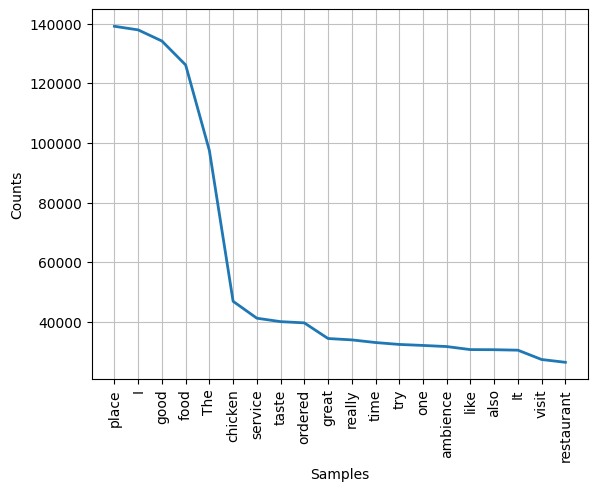

<Axes: xlabel='Samples', ylabel='Counts'>

In [60]:
fd.plot(20)


### Importing the bigrams and trigrams from the nltk package

In [61]:
from nltk import FreqDist , bigrams , trigrams

## Applying bigram function on the 1D dataframe

In [62]:
bi_grams = bigrams(total_reviews_1D)

### Getting bigram with the help of freqDist

In [63]:
fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

### Getting 20 most common words in the list 

In [64]:
fd_bigrams.most_common(20)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078)]

### Plotting the 20 most common bigrams 

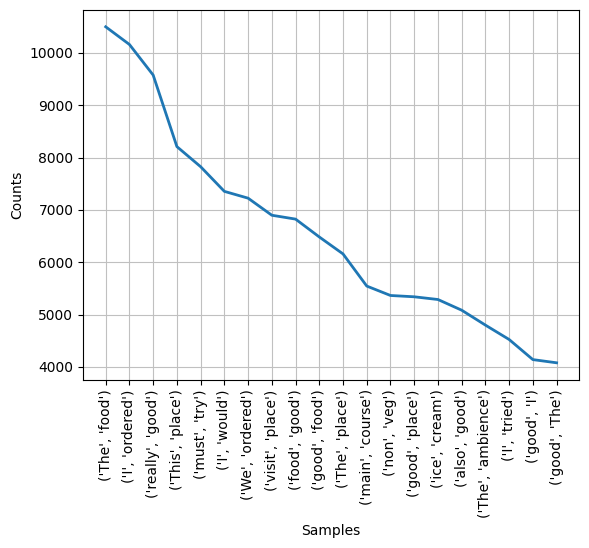

<Axes: xlabel='Samples', ylabel='Counts'>

In [65]:
fd_bigrams.plot(20)

### Getting 100 most common words in |the list 

In [66]:
fd_bigrams.most_common(100)

[(('The', 'food'), 10497),
 (('I', 'ordered'), 10159),
 (('really', 'good'), 9575),
 (('This', 'place'), 8208),
 (('must', 'try'), 7824),
 (('I', 'would'), 7353),
 (('We', 'ordered'), 7223),
 (('visit', 'place'), 6897),
 (('food', 'good'), 6823),
 (('good', 'food'), 6482),
 (('The', 'place'), 6158),
 (('main', 'course'), 5544),
 (('non', 'veg'), 5364),
 (('good', 'place'), 5339),
 (('ice', 'cream'), 5287),
 (('also', 'good'), 5083),
 (('The', 'ambience'), 4798),
 (('I', 'tried'), 4523),
 (('good', 'I'), 4139),
 (('good', 'The'), 4078),
 (('food', 'I'), 3998),
 (('place', 'I'), 3896),
 (('The', 'service'), 3830),
 (('one', 'best'), 3711),
 (('must', 'visit'), 3658),
 (('I', 'love'), 3529),
 (('quality', 'food'), 3510),
 (('nWe', 'ordered'), 3490),
 (('time', 'I'), 3398),
 (('nice', 'place'), 3290),
 (('The', 'staff'), 3286),
 (('taste', 'good'), 3275),
 (('pretty', 'good'), 3270),
 (('fried', 'rice'), 3127),
 (('pocket', 'friendly'), 3097),
 (('place', 'good'), 3083),
 (('I', 'loved'), 

## Applying trigram function on the 1D dataframe

In [67]:
tri_grams = trigrams(total_reviews_1D)

### Getting bigram with the help of freqDist

In [68]:
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

### Getting 50 most common words in the list

In [69]:
fd_trigrams.most_common(50)

[(('veg', 'non', 'veg'), 1525),
 (('must', 'visit', 'place'), 1487),
 (('The', 'food', 'good'), 1339),
 (('place', 'hangout', 'friends'), 1165),
 (('I', 'must', 'say'), 1131),
 (('I', 'would', 'recommend'), 1059),
 (('I', 'visited', 'place'), 1054),
 (('I', 'would', 'say'), 979),
 (('place', 'hang', 'friends'), 967),
 (('food', 'really', 'good'), 886),
 (('nFood', 'nAmbience', 'nService'), 845),
 (('A', 'must', 'visit'), 768),
 (('The', 'ambience', 'good'), 751),
 (('A', 'good', 'place'), 737),
 (('North', 'Indian', 'food'), 675),
 (('I', 'would', 'like'), 619),
 (('nFood', 'nService', 'nAmbience'), 607),
 (('A', 'must', 'try'), 603),
 (('I', 'really', 'liked'), 595),
 (('I', 'ordered', 'chicken'), 582),
 (('first', 'time', 'I'), 570),
 (('The', 'staff', 'friendly'), 561),
 (('The', 'best', 'part'), 561),
 (('The', 'food', 'really'), 559),
 (('Overall', 'good', 'experience'), 558),
 (('I', 'love', 'place'), 554),
 (('paneer', 'butter', 'masala'), 554),
 (('really', 'good', 'The'), 552)

### Plotting the 20 most common trigrams 

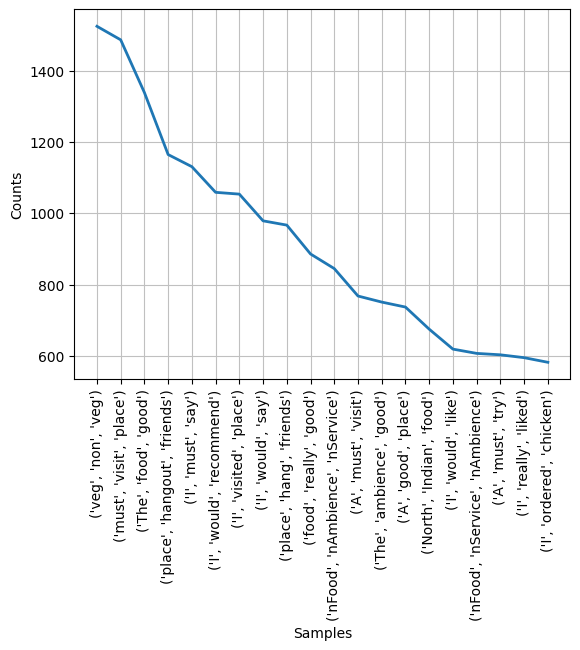

<Axes: xlabel='Samples', ylabel='Counts'>

In [70]:
fd_trigrams.plot(20)

### 6. Performing Spatial Analysis

### Installing geocoder and geopy package 

In [71]:
!pip install geocoder
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Getting the unique values in the location column of the dataframe

In [72]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

### Checking the length of the unique values in the location column of the daaframe

In [73]:
len(df['location'].unique())

94

### Concating the hierarchy of the location for the precise location

In [74]:
df['location'] = df['location']+ " , Bangalore , Karnataka , India "

### Checking the unique locations after the changes

In [75]:
df['location'].unique()

array(['Banashankari , Bangalore , Karnataka , India ',
       'Basavanagudi , Bangalore , Karnataka , India ',
       'Mysore Road , Bangalore , Karnataka , India ',
       'Jayanagar , Bangalore , Karnataka , India ',
       'Kumaraswamy Layout , Bangalore , Karnataka , India ',
       'Rajarajeshwari Nagar , Bangalore , Karnataka , India ',
       'Vijay Nagar , Bangalore , Karnataka , India ',
       'Uttarahalli , Bangalore , Karnataka , India ',
       'JP Nagar , Bangalore , Karnataka , India ',
       'South Bangalore , Bangalore , Karnataka , India ',
       'City Market , Bangalore , Karnataka , India ',
       'Nagarbhavi , Bangalore , Karnataka , India ',
       'Bannerghatta Road , Bangalore , Karnataka , India ',
       'BTM , Bangalore , Karnataka , India ',
       'Kanakapura Road , Bangalore , Karnataka , India ',
       'Bommanahalli , Bangalore , Karnataka , India ', nan,
       'CV Raman Nagar , Bangalore , Karnataka , India ',
       'Electronic City , Bangalore , 

## Copying the data into the different dataframe

In [76]:
df_copy = df.copy()

### Checking the null values in the datafram of location columns

In [77]:
df_copy['location'].isnull().sum()

np.int64(21)

### Dropping the null values from the location columns

In [78]:
df_copy = df_copy.dropna(subset = ['location'])

### Checking the dataframe after making the changes

In [79]:
df_copy['location'].isnull().sum()

np.int64(0)

### Creating a different dataframe of only the unique values from the  location column

In [80]:
locations = pd.DataFrame(df_copy['location'].unique())

### Renaming the column names 

In [81]:
locations.columns = ['name']

### Checking the dataframe after the changes

In [82]:
locations

,name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"
3,"Jayanagar , Bangalore , Karnataka , India"
4,"Kumaraswamy Layout , Bangalore , Karnataka , I..."
...,...
88,"West Bangalore , Bangalore , Karnataka , India"
89,"Magadi Road , Bangalore , Karnataka , India"
90,"Yelahanka , Bangalore , Karnataka , India"
91,"Sahakara Nagar , Bangalore , Karnataka , India"


### Importing Nominatim from the geopy gecoders

In [83]:
from geopy.geocoders import Nominatim

### Assigning Naminatim function

In [84]:
geolocator = Nominatim(user_agent = "app", timeout = None)


### Getting the latitude and Longitude from the Nominatim function of each location if not present appending NaN values

In [85]:
lat = []
lon = []

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

### Adding the columns lat and and lon in which storing the latitudes ad longitudes of all the locations

In [86]:
locations['lat'] = lat
locations['lon'] = lon

In [87]:
locations

,name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.939333,77.553982
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.951766,77.540063
3,"Jayanagar , Bangalore , Karnataka , India",12.941849,77.586898
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.906768,77.559502
...,...,...,...
88,"West Bangalore , Bangalore , Karnataka , India",13.009476,77.553089
89,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
90,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
91,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


### Checking the null values in the locations dataframe

In [88]:
locations.isnull().sum()

name    0
lat     2
lon     2
dtype: int64

### Checking which rows nave null values 

In [89]:
locations[locations['lat'].isna()]

,name,lat,lon
79,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
85,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


### Manually Passing the latitude and logitude which contains null values

In [90]:
locations['lat'][79] = 13.0163
locations['lon'][79]= 77.6785

In [91]:
locations['lat'][85] = 13.0068
locations['lon'][85]= 77.5813

### Checking the null values in the locations dataframe

In [92]:
locations[locations['lat'].isna()]

,name,lat,lon


### Checking the null values in the column cuisines in dataframe

In [93]:
df['cuisines'].isnull().sum()

np.int64(45)

### Dropping the values which have null values from the cuisines 

In [94]:
df = df.dropna(subset = ['cuisines'])

### Storing the values in the df which contains the North Indian cuisine in the Restaurant

In [95]:
north_india = df[df['cuisines'].str.contains('North Indian')]

### Checking the shape/Structure of the Dataframe

In [96]:
north_india.shape

(21085, 18)

### Checking the top 2 rows from the dataframe

In [97]:
north_india.head(2)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Getting the count of restaurant locations having with there location names and reseting there names

In [98]:
north_india_rest_count = north_india['location'].value_counts().reset_index().rename(columns={'location':'name'})

### Checking the dataframe

In [99]:
north_india_rest_count

,name,count
0,"BTM , Bangalore , Karnataka , India",2469
1,"HSR , Bangalore , Karnataka , India",1123
2,"Whitefield , Bangalore , Karnataka , India",1059
3,"Marathahalli , Bangalore , Karnataka , India",1038
4,"JP Nagar , Bangalore , Karnataka , India",958
...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4
86,"Jakkur , Bangalore , Karnataka , India",3
87,"Central Bangalore , Bangalore , Karnataka , In...",2
88,"West Bangalore , Bangalore , Karnataka , India",1


### Joining the two Dataframes 1. the dataframes with the latitude and longitudes and 2. the dataframe with northindia restaurants in those locations and the count of the restaurants present in that location

In [100]:
heatmap_df = north_india_rest_count.merge(locations, on='name', how = 'left')

### Checking the joined Dataframe

In [101]:
heatmap_df

,name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",2469,12.915971,77.616227
1,"HSR , Bangalore , Karnataka , India",1123,12.900563,77.649475
2,"Whitefield , Bangalore , Karnataka , India",1059,12.969637,77.749745
3,"Marathahalli , Bangalore , Karnataka , India",1038,12.955257,77.698416
4,"JP Nagar , Bangalore , Karnataka , India",958,12.909694,77.586607
...,...,...,...,...
85,"Hebbal , Bangalore , Karnataka , India",4,13.038218,77.591900
86,"Jakkur , Bangalore , Karnataka , India",3,13.078474,77.606894
87,"Central Bangalore , Bangalore , Karnataka , In...",2,12.973393,77.611247
88,"West Bangalore , Bangalore , Karnataka , India",1,13.009476,77.553089


### Installing the folium package fr the saptial Analysis

In [102]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


### Importing the folium module

In [103]:
import folium 

### Initialysing the folium map 

In [104]:
basemap = folium.Map()

### Calling Initailized basemap

In [105]:
basemap

### Checking the columns in the dataframe

In [106]:
heatmap_df.columns

Index(['name', 'count', 'lat', 'lon'], dtype='object')

### Importing the Heatmap from the folium plugings

In [107]:
from folium.plugins import HeatMap

### Add the values to the heatmap of the basemap for visualization

In [108]:
HeatMap(heatmap_df[[ 'lat', 'lon' ,'count']]).add_to(basemap)

### Calling the updated basemap

In [109]:
basemap

### 7. Automating Spatial Analysis

### Creating a dynamic function to get the heatmap on different cuisines individually

In [110]:
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_df_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'location':'name'})
    heatmap_df = cuisine_df_rest_count.merge(locations, on='name', how = 'left')
    print(heatmap_df.head(4))
    basemap = folium.Map()
    HeatMap(heatmap_df[[ 'lat', 'lon' ,'count']]).add_to(basemap)
    return basemap

### Calling the function for the South Indian Cuisine

In [111]:
get_heatmap('South Indian')

                                         name  count        lat        lon
0        BTM , Bangalore , Karnataka , India     815  12.915971  77.616227
1   JP Nagar , Bangalore , Karnataka , India     437  12.909694  77.586607
2        HSR , Bangalore , Karnataka , India     436  12.900563  77.649475
3  Jayanagar , Bangalore , Karnataka , India     416  12.941849  77.586898


### Calling the function for the Chinese Cuisine

In [112]:
get_heatmap('Chinese')

                                                name  count        lat  \
0               BTM , Bangalore , Karnataka , India    1824  12.915971   
1               HSR , Bangalore , Karnataka , India     760  12.900563   
2  Koramangala 5th Block , Bangalore , Karnataka ...    730  12.934843   
3      Marathahalli , Bangalore , Karnataka , India     668  12.955257   

         lon  
0  77.616227  
1  77.649475  
2  77.618977  
3  77.698416  


### Calling the function for the Italian Cuisine

In [113]:
get_heatmap('Italian')

                                                name  count        lat  \
0  Koramangala 5th Block , Bangalore , Karnataka ...    220  12.934843   
1       Indiranagar , Bangalore , Karnataka , India     209  12.996298   
2  Koramangala 4th Block , Bangalore , Karnataka ...    187  12.932778   
3          JP Nagar , Bangalore , Karnataka , India     185  12.909694   

         lon  
0  77.618977  
1  77.545278  
2  77.629405  
3  77.586607  
